Libraritë
Numpy-Eshte librari e Python e cila shton support per matrica dhe vargje te medha ,shume-dimensionale , se bashku me nje bashkesi te madhe funksionesh qe operojne ne keto vargje.
Pandas- Eshte librari e cila mundeson analizen dhe manipulimin me te dhena . Ne vecanti ofron struktura te te dhenave dhe operacione per manipulimin e tabelave numerike .
Matplotlib - Eshte librari gjithperfshirese per krijimin e vizualizimeve statike , te animuara dhe interaktive.
Seaborn - Seaborn eshte librari per vizualizimin e te dhenave ne python e bazuar ne matplotlib.
Scikit-Learn është një librari e machine learning në kuadër të Python. Përmban algoritme të ndryshme si support vector machine, randsom forest, k-neighbour etj. Poashtu mbështet libraritë numerike e shkencore të Python sic jane NumPy dhe SciPy.


In [2]:
#importimi i librarive 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

Leximi i dataset-it permes librarise Pandas 

In [5]:
#Leximi i datasetit 
dataset = pd.read_csv(r"C:\Users\Admin\Desktop\students-performance-in-exams\StudentsPerformance.csv")

In [6]:
#Shfaqja e 6 rreshtave te pare
dataset.head(6)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


Funksioni tail kthen 5 rreshtat e fundit te dataset-it .

In [7]:
dataset.tail()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
#Gjenerimi i 10 rreshtave random
dataset.sample(10) 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
594,female,group C,bachelor's degree,standard,completed,92,100,99
901,female,group C,master's degree,standard,none,73,78,74
206,male,group E,bachelor's degree,standard,none,82,62,62
894,female,group E,associate's degree,standard,none,59,62,69
282,female,group D,bachelor's degree,free/reduced,none,73,79,84
802,female,group E,associate's degree,standard,none,87,94,95
612,male,group C,bachelor's degree,standard,completed,94,90,91
702,male,group A,bachelor's degree,standard,completed,87,84,87
504,female,group D,master's degree,free/reduced,none,40,59,54
327,male,group A,some college,free/reduced,none,28,23,19


Describe gjeneron statistika pershkruese te dataset-it .

In [9]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#Dimensioni i datasetit (kolona dhe rreshta)
dataset.shape

(1000, 8)

In [11]:
#indeksi i datasetit
dataset.index

RangeIndex(start=0, stop=1000, step=1)

In [12]:
#kolona te datasetit
dataset.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
#tipet e te dhenave te kolonave
dataset.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [14]:
#vlerat unike per secilin atribut te datasetit
print(dataset.nunique())

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [15]:
#kontrollo te dhenat
dataset.isnull().values.any()

False

In [16]:
#Kontrollo gjithe te dhenat per vlera null
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
#show count Gender
dataset['gender'].value_counts(ascending = False)

female    518
male      482
Name: gender, dtype: int64

In [18]:
perqindja_gender = round(dataset['gender'].value_counts() / len(dataset['gender']) * 100,2)

print("Perqindjet e pjesemarrjeve te gjinive: ")
print(perqindja_gender)

Perqindjet e pjesemarrjeve te gjinive: 
female    51.8
male      48.2
Name: gender, dtype: float64


In [19]:
dataset['parental level of education'].value_counts(ascending = False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [20]:
perqindja_peducation = round(dataset['parental level of education'].value_counts() / len(dataset['parental level of education']) * 100,2)

print("Perqindjet ne baze te nivelit arsimor te prinderve: ")
print(perqindja_peducation)

Perqindjet ne baze te nivelit arsimor te prinderve: 
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64


In [21]:
dataset['lunch'].value_counts(ascending = False)

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [22]:
dataset['test preparation course'].value_counts(ascending = False)

none         642
completed    358
Name: test preparation course, dtype: int64

In [23]:
dataset[['gender', 'math score']].groupby(['gender'], as_index=False).mean().sort_values(by='math score', ascending=False)

,gender,math score
1,male,68.728216
0,female,63.633205


In [24]:
dataset[['gender', 'reading score']].groupby(['gender'], as_index=False).mean().sort_values(by='reading score', ascending=False)

,gender,reading score
0,female,72.608108
1,male,65.473029


In [25]:
dataset[['gender', 'writing score']].groupby(['gender'], as_index=False).mean().sort_values(by='writing score', ascending=False)

,gender,writing score
0,female,72.467181
1,male,63.311203


In [26]:
dataset[['race/ethnicity', 'math score','reading score','writing score']].groupby(['race/ethnicity'], as_index=False).mean().sort_values(by='math score', ascending=False)

,race/ethnicity,math score,reading score,writing score
4,group E,73.821429,73.028571,71.407143
3,group D,67.362595,70.030534,70.145038
2,group C,64.463950,69.103448,67.827586
1,group B,63.452632,67.352632,65.600000
0,group A,61.629213,64.674157,62.674157


In [27]:
#Funksioni qe e therret matricen e korelacionit
dataset.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


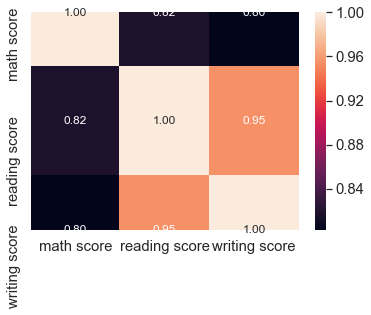

In [28]:
# matrica e korrelacionit
Var_Corr = dataset[[ 'race/ethnicity', 'parental level of education','lunch','test preparation course','math score','reading score','writing score']].corr()
#krijimi i heatmap
sns.set(font_scale=1.35)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns,fmt= '.2f', cbar=True, annot=True, annot_kws={'size': 12})

In [29]:
#zevendesimi i vlerave string ne ato numerike per kolonen e test preparation course
def replace_test_preparation(x):
    if x=='completed':
        return 1
    elif x=='none':
        return 0
dataset['test preparation course']=dataset['test preparation course'].apply(replace_test_preparation)       

In [30]:
totali_i_pikeve = (dataset["math score"]+dataset["reading score"]+dataset["writing score"])

In [31]:
dataset["totali_i_pikeve"] = totali_i_pikeve

In [32]:
#mesatarja e pikeve ne lende
dataset["mesatarja"] = (dataset["math score"]+dataset["reading score"]+dataset["writing score"])/3
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,totali_i_pikeve,mesatarja
0,female,group B,bachelor's degree,standard,0,72,72,74,218,72.666667
1,female,group C,some college,standard,1,69,90,88,247,82.333333
2,female,group B,master's degree,standard,0,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,0,47,57,44,148,49.333333
4,male,group C,some college,standard,0,76,78,75,229,76.333333


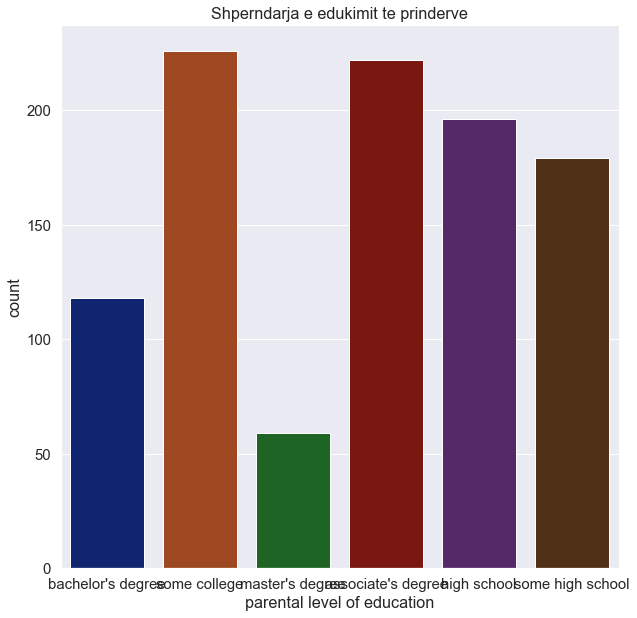

In [33]:
plt.figure(figsize = (10,10))
plt.title('Shperndarja e edukimit te prinderve')
sns.countplot(x="parental level of education", data = dataset, palette="dark")
plt.show()

[]

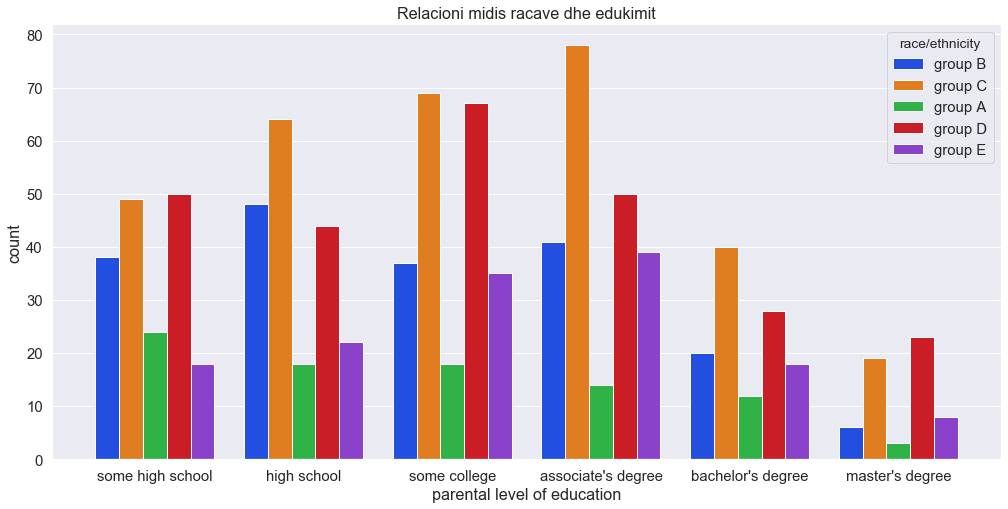

In [34]:
plt.figure(figsize=(17,8))
sns.countplot(x='parental level of education', data = dataset, hue='race/ethnicity',
              order = ['some high school', 'high school', 'some college', 
                "associate's degree", "bachelor's degree", "master's degree"], 
              palette='bright')
plt.title('Relacioni midis racave dhe edukimit')
plt.plot()

In [35]:
kalueshmeria = 50

In [36]:
#Rezultati nga testi ne matematike 
dataset['Kalueshmeria_math']=np.where(dataset['math score']>=50,'Kaluan','Nuk_kaluan')
print(dataset['Kalueshmeria_math'].value_counts())

Kaluan        865
Nuk_kaluan    135
Name: Kalueshmeria_math, dtype: int64


In [37]:
#Rezultati nga testi ne lexim
dataset['Kalueshmeria_lexim']=np.where(dataset['reading score']>=50,'Kaluan','Nuk_kaluan')
print(dataset['Kalueshmeria_lexim'].value_counts())

Kaluan        910
Nuk_kaluan     90
Name: Kalueshmeria_lexim, dtype: int64


In [38]:
#Rezultati nga testi ne shkrim
dataset['Kalueshmeria_shkrim']=np.where(dataset['writing score']>=50,'Kaluan','Nuk_kaluan')
print(dataset['Kalueshmeria_shkrim'].value_counts())

Kaluan        886
Nuk_kaluan    114
Name: Kalueshmeria_shkrim, dtype: int64


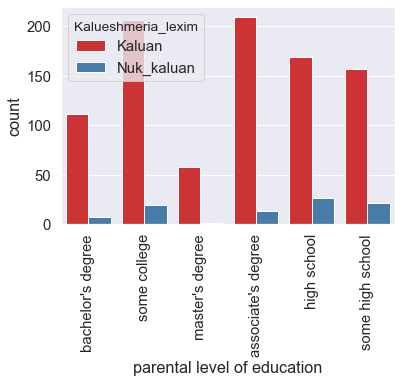

In [41]:
#Rezultati ne lexim sipas nivelit te shkollimit te prinderve 
p = sns.countplot(x='parental level of education', data = dataset, hue='Kalueshmeria_lexim', palette='Set1')
_ = plt.setp(p.get_xticklabels(), rotation=90)

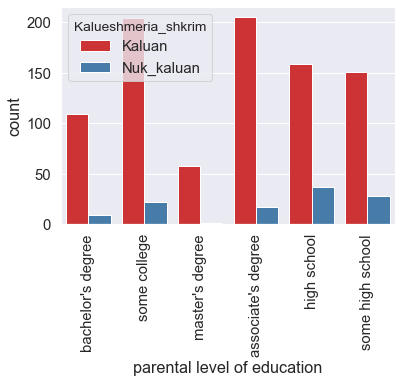

In [42]:
#Rezultati ne shkrim sipas nivelit te shkollimit te prinderve 
p = sns.countplot(x='parental level of education', data = dataset, hue='Kalueshmeria_shkrim', palette='Set1')
_ = plt.setp(p.get_xticklabels(), rotation=90)

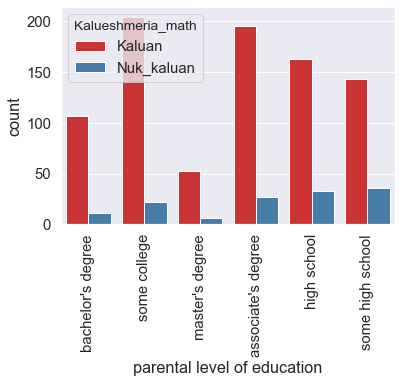

In [43]:
#Rezultati ne matematike sipas nivelit te shkollimit te prinderve 
p = sns.countplot(x='parental level of education', data = dataset, hue='Kalueshmeria_math', palette='Set1')
_ = plt.setp(p.get_xticklabels(), rotation=90)

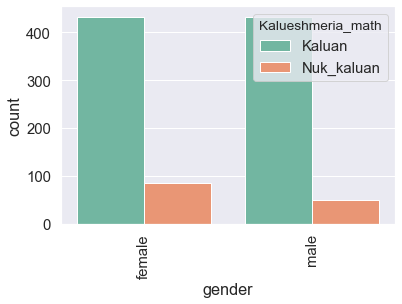

In [45]:
#Rezultati ne matematike sipas gjinise 
p = sns.countplot(x='gender', data = dataset, hue='Kalueshmeria_math', palette='Set2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

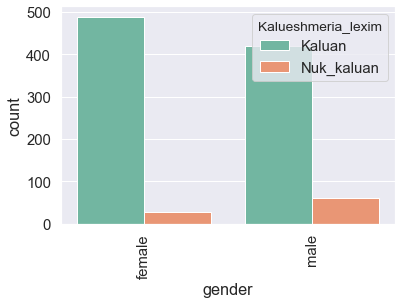

In [46]:
#Rezultati ne lexim sipas gjinise 
p = sns.countplot(x='gender', data = dataset, hue='Kalueshmeria_lexim', palette='Set2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

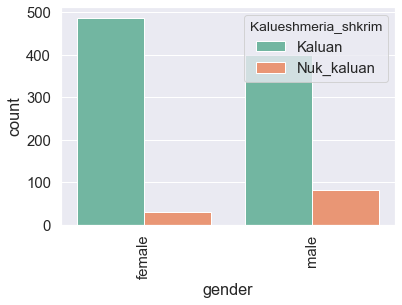

In [47]:
#Rezultati ne shkrim sipas gjinise 
p = sns.countplot(x='gender', data = dataset, hue='Kalueshmeria_shkrim', palette='Set2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

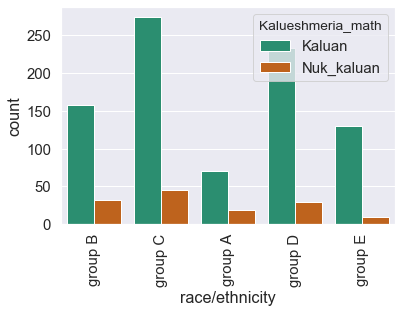

In [48]:
#Rezultati ne matematike sipas races/etnise
p = sns.countplot(x='race/ethnicity', data = dataset, hue='Kalueshmeria_math', palette='Dark2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

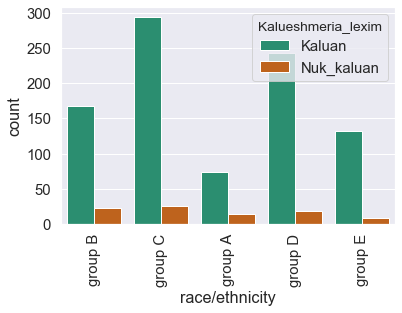

In [49]:
#Rezultati ne lexim sipas races/etnise
p = sns.countplot(x='race/ethnicity', data = dataset, hue='Kalueshmeria_lexim', palette='Dark2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

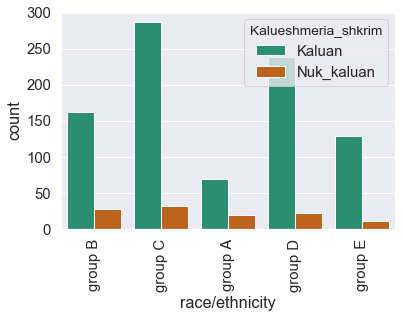

In [50]:
#Rezultati ne shkrim sipas races/etnise
p = sns.countplot(x='race/ethnicity', data = dataset, hue='Kalueshmeria_shkrim', palette='Dark2')
_ = plt.setp(p.get_xticklabels(), rotation=90)

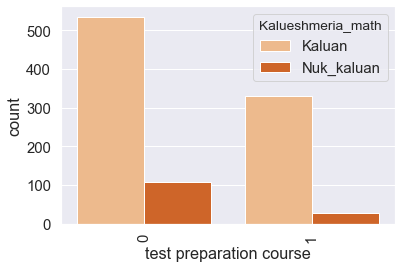

In [52]:
#Rezultati ne matematike sipas pergatitjes per test
p = sns.countplot(x='test preparation course', data = dataset, hue='Kalueshmeria_math', palette='Oranges')
_ = plt.setp(p.get_xticklabels(), rotation=90)

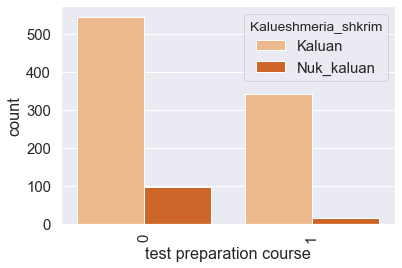

In [53]:
#Rezultati ne shkrim sipas pergatitjes per test
p = sns.countplot(x='test preparation course', data = dataset, hue='Kalueshmeria_shkrim', palette='Oranges')
_ = plt.setp(p.get_xticklabels(), rotation=90)

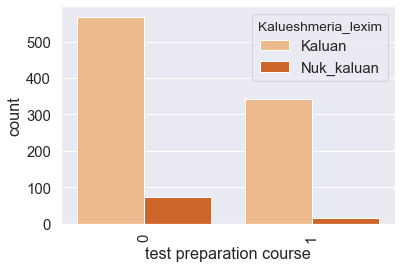

In [54]:
#Rezultati nelexim sipas pergatitjes per test
p = sns.countplot(x='test preparation course', data = dataset, hue='Kalueshmeria_lexim', palette='Oranges')
_ = plt.setp(p.get_xticklabels(), rotation=90)

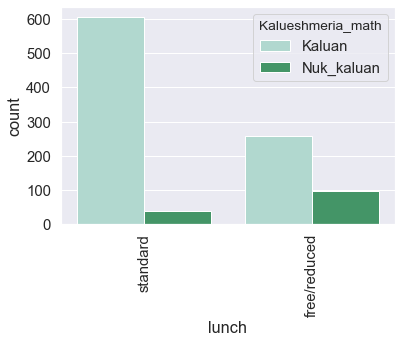

In [55]:
#Rezultati ne matematike sipas menyres se te ushqyerit
p = sns.countplot(x='lunch', data = dataset, hue='Kalueshmeria_math', palette='BuGn')
_ = plt.setp(p.get_xticklabels(), rotation=90)

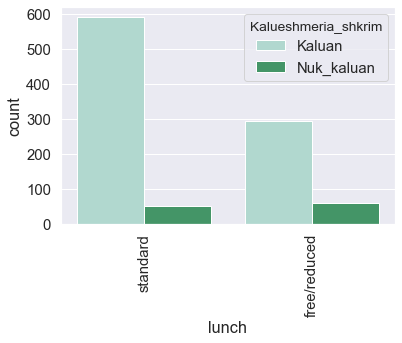

In [56]:
#Rezultati ne shkrim sipas menyres se te ushqyerit
p = sns.countplot(x='lunch', data = dataset, hue='Kalueshmeria_shkrim', palette='BuGn')
_ = plt.setp(p.get_xticklabels(), rotation=90)

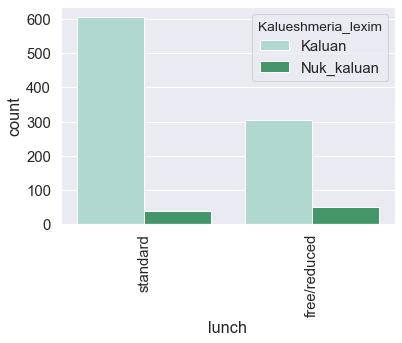

In [57]:
#Rezultati ne lexim sipas menyres se te ushqyerit
p = sns.countplot(x='lunch', data = dataset, hue='Kalueshmeria_lexim', palette='BuGn')
_ = plt.setp(p.get_xticklabels(), rotation=90)

In [58]:
#kthe mesataren ne integer
dataset['mesatarja'] = dataset['mesatarja'].astype('int')
# kalkulo piket per cilen note jane
dataset['notimi'] = ['10 ' if 100>=i>=90 
                                else '9 ' if 89>=i>=80 
                                else '8' if 79>=i>=70 
                                else '7' if 69>=i>=60 
                                else '6 ' if 59>=i>=50                  
                                else '5' for i in dataset.mesatarja]

In [59]:
dataset.notimi.value_counts(ascending = False)

8      261
7      256
6      182
9      146
5      103
10      52
Name: notimi, dtype: int64

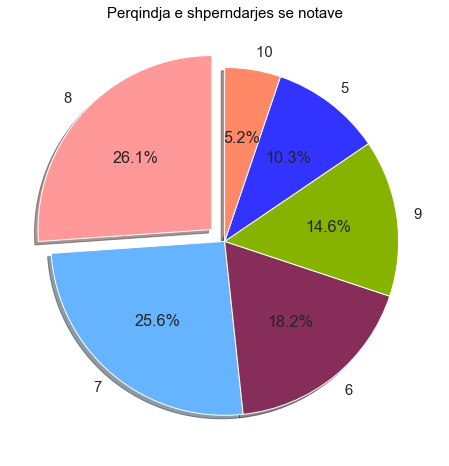

In [60]:
labels = dataset.notimi.value_counts().index

explode = [0.1,0,0,0,0,0]

sizes= dataset.notimi.value_counts().values

#vizualizimi 

#shto ngjyrat
colors = ['#ff9999','#66b3ff','#862d59','#86b300','#3333ff','#ff8866']

plt.figure(figsize = (8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Perqindja e shperndarjes se notave',color = 'black',fontsize = 15)


plt.show()


In [61]:
data_random = dataset.sample(20,random_state=42)
data_random.index = np.arange(0,len(data_random))

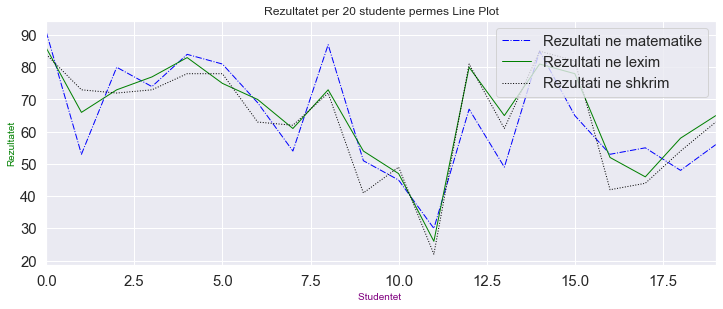

In [62]:
data1 = data_random
data1["math score"].plot(figsize=(12,4.5),kind = "line",color = "blue",label="Rezultati ne matematike",linewidth = 1,alpha=1,grid=True,linestyle='-.')
data1["reading score"].plot(kind = "line",color="green",label="Rezultati ne lexim",linewidth=1,alpha=1,grid=True,linestyle="-")
data1["writing score"].plot(kind = "line",color = "black",label = "Rezultati ne shkrim",linewidth=1,alpha=1,grid=True,linestyle=":")
plt.legend(loc="upper right")
plt.xlabel('Studentet ',FontSize = 10,color = "purple")
plt.ylabel("Rezultatet",FontSize = 10, color = "green")
plt.title("Rezultatet per 20 studente permes Line Plot",FontSize = 12)
plt.show() 

In [63]:
dataset['statusi'] = dataset.apply(lambda x : 'Nuk_kaluan' if x['Kalueshmeria_math'] == 'Nuk_kaluan' or 
                           x['Kalueshmeria_lexim'] == 'Nuk_kaluan' or x['Kalueshmeria_shkrim'] == 'Nuk_kaluan'
                           else 'Kaluan', axis = 1)

print(dataset['statusi'].value_counts(dropna = False))

Kaluan        812
Nuk_kaluan    188
Name: statusi, dtype: int64


In [64]:
from sklearn.preprocessing import LabelEncoder

#Krijimi i encoder
le = LabelEncoder()

# Enkodimi per test preparation course
dataset['test preparation course'] = le.fit_transform(dataset['test preparation course'])

# Enkodimi per lunch
dataset['lunch'] = le.fit_transform(dataset['lunch'])

# Enkodimi per race/ethnicity
dataset['race/ethnicity'] = le.fit_transform(dataset['race/ethnicity'])

# Enkodimi per parental level of education
dataset['parental level of education'] = le.fit_transform(dataset['parental level of education'])

#Enkodimi per gender
dataset['gender'] = le.fit_transform(dataset['gender'])

# Enkodimi per Kalueshmeria_math
dataset['Kalueshmeria_math'] = le.fit_transform(dataset['Kalueshmeria_math'])

# Enkodimi per Kalueshmeria_lexim
dataset['Kalueshmeria_lexim'] = le.fit_transform(dataset['Kalueshmeria_lexim'])

# Enkodimi per Kalueshmeria_shkrim
dataset['Kalueshmeria_shkrim'] = le.fit_transform(dataset['Kalueshmeria_shkrim'])

# Enkodimi per status
dataset['statusi'] = le.fit_transform(dataset['statusi'])

In [65]:
# Ndarja e te dhenave te varura nga ato te pavarura

x = dataset.iloc[:,:5]
y = dataset.iloc[:,12]

print(x.shape)
print(y.shape)

(1000, 5)
(1000,)


In [66]:
from sklearn.model_selection import train_test_split

#Ndarja e te dhenave ne trajnuese dhe testuese
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 5)
(750,)
(250, 5)
(250,)


Logistic Regression

In [67]:
from sklearn.linear_model import  LogisticRegression

# krijimi i modelit 
model = LogisticRegression()

# vendosja e te dhenave trajnuese ne model
model.fit(x_train, y_train)

# predikimi i rezultatit te test set
y_pred = model.predict(x_test)

# kalkulimi i saktesise se klasifikimit
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy : 0.888
Testing Accuracy : 0.868


Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

# krijimi i modelit
model = RandomForestClassifier()

# vendosja e te dhenave trajnuese 
model.fit(x_train, y_train)

# predikimi i x-test rezultatit
y_pred = model.predict(x_test)

# kalkulimi i saktesise
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.9093333333333333
Testing Accuracy : 0.832


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decission Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print("Training accuracy:",model.score(x_train,y_train))
print("Testing accuracy:",model.score(x_test,y_test))


Training accuracy: 0.9106666666666666
Testing accuracy: 0.852
